# From NumPy to TensorFlow & Keras 3: A Complete Deep Learning Journey

## Master TensorFlow and Keras from First Principles to Production-Ready Code

---

In the previous notebooks, we built neural networks **from scratch with NumPy** and learned **PyTorch**. Now we'll master **TensorFlow** and **Keras 3** - the framework that powers Google's AI, deployed on billions of devices worldwide.

### Why TensorFlow & Keras?

| Feature | NumPy | TensorFlow/Keras |
|---------|-------|------------------|
| Automatic Differentiation | Manual | Built-in (GradientTape) |
| GPU/TPU Acceleration | No | Yes (CUDA, TPU) |
| Production Deployment | Limited | TF Serving, TFLite, TF.js |
| Mobile/Edge | No | TensorFlow Lite |
| Ecosystem | Scientific | Complete ML pipeline |

### What You'll Learn

| Part | Topic | Key Concepts |
|------|-------|-------------|
| **I** | TensorFlow Fundamentals | Tensors, dtypes, devices, operations |
| **II** | Einstein Summation | tf.einsum - powerful tensor operations |
| **III** | GradientTape Magic | Automatic differentiation, watching variables |
| **IV** | From Scratch (Primitives) | Build NN using only basic TF ops |
| **V** | High-Level Keras API | Sequential, Functional, layers |
| **VI** | Complete Training | Model.fit(), callbacks, best practices |

---

*"TensorFlow is the bridge from research to production."*

In [ ]:
# ============================================================================
#                           SETUP & IMPORTS
# ============================================================================

# Install latest TensorFlow if needed (uncomment for Colab)
# !pip install --upgrade tensorflow

import tensorflow as tf
import keras  # Keras 3 - standalone import
from keras import layers, Model, Sequential
import numpy as np
import matplotlib.pyplot as plt
from typing import List, Tuple, Optional, Callable

# Beautiful plots
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12

# Check versions and GPU availability
print(f"TensorFlow Version: {tf.__version__}")
print(f"Keras Version:      {keras.__version__}")
print(f"GPU Available:      {len(tf.config.list_physical_devices('GPU')) > 0}")

gpus = tf.config.list_physical_devices('GPU')
if gpus:
    print(f"GPU Device:         {gpus[0].name}")
    # Enable memory growth to avoid grabbing all GPU memory
    for gpu in gpus:
        tf.config.experimental.set_memory_growth(gpu, True)

# Reproducibility
tf.random.set_seed(42)
np.random.seed(42)

print("\nReady to learn TensorFlow & Keras!")

TensorFlow Version: 2.19.0
Keras Version:      3.10.0
GPU Available:      False

Ready to learn TensorFlow & Keras!


---

# Part I: TensorFlow Tensor Fundamentals

## The Building Block of Deep Learning

A **tensor** is a multi-dimensional array - the fundamental data structure in TensorFlow.

```
Scalar (0D)     Vector (1D)      Matrix (2D)       3D Tensor
                                                   
    5           [1, 2, 3]        [[1, 2],          [[[1,2],
                                  [3, 4]]            [3,4]],
                                                    [[5,6],
                                                     [7,8]]]
```

### TensorFlow Tensors vs NumPy Arrays

TensorFlow tensors are like NumPy arrays, but with superpowers:
- **GPU/TPU acceleration** - automatic hardware optimization
- **Automatic differentiation** - GradientTape tracks operations
- **Immutability** - tensors are immutable (safer, more predictable)
- **Lazy execution** - operations can be optimized before running

In [ ]:
# ============================================================================
#                        CREATING TENSORS
# ============================================================================

print("=" * 60)
print("              CREATING TENSORS")
print("=" * 60)

# --------------------- From Python Lists ---------------------
print("\n1. From Python Lists:")
tensor_from_list = tf.constant([[1, 2, 3], [4, 5, 6]])
print(f"   tensor: {tensor_from_list}")
print(f"   shape:  {tensor_from_list.shape}")
print(f"   dtype:  {tensor_from_list.dtype}")

# --------------------- From NumPy Arrays ---------------------
print("\n2. From NumPy Arrays:")
numpy_array = np.array([[1.0, 2.0], [3.0, 4.0]])
tensor_from_numpy = tf.constant(numpy_array)
print(f"   NumPy dtype:  {numpy_array.dtype}")
print(f"   Tensor dtype: {tensor_from_numpy.dtype}")

# Convert back to NumPy
back_to_numpy = tensor_from_numpy.numpy()
print(f"   Back to NumPy: {type(back_to_numpy)}")

# --------------------- Special Tensors ---------------------
print("\n3. Special Tensors:")
zeros = tf.zeros((2, 3))
ones = tf.ones((2, 3))
rand_uniform = tf.random.uniform((2, 3))        # Uniform [0, 1)
rand_normal = tf.random.normal((2, 3))          # Standard normal
identity = tf.eye(3)                            # Identity matrix
arange = tf.range(0, 10, 2)                     # Like range()
linspace = tf.linspace(0.0, 1.0, 5)             # Evenly spaced

print(f"   zeros(2,3):\n{zeros}")
print(f"   random.normal(2,3):\n{rand_normal}")
print(f"   eye(3):\n{identity}")
print(f"   range(0,10,2): {arange}")
print(f"   linspace(0,1,5): {linspace}")

# --------------------- With Specific Properties ---------------------
print("\n4. With Specific dtype:")
float_tensor = tf.constant([1, 2, 3], dtype=tf.float32)
int_tensor = tf.cast(tf.constant([1.5, 2.5]), dtype=tf.int64)
print(f"   float32: {float_tensor} (dtype: {float_tensor.dtype})")
print(f"   int64:   {int_tensor} (dtype: {int_tensor.dtype})")

              CREATING TENSORS

1. From Python Lists:
   tensor: [[1 2 3]
 [4 5 6]]
   shape:  (2, 3)
   dtype:  <dtype: 'int32'>

2. From NumPy Arrays:
   NumPy dtype:  float64
   Tensor dtype: <dtype: 'float64'>
   Back to NumPy: <class 'numpy.ndarray'>

3. Special Tensors:
   zeros(2,3):
[[0. 0. 0.]
 [0. 0. 0.]]
   random.normal(2,3):
[[ 0.08422458 -0.86090374  0.37812304]
 [-0.00519627 -0.49453196  0.6178192 ]]
   eye(3):
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
   range(0,10,2): [0 2 4 6 8]
   linspace(0,1,5): [0.   0.25 0.5  0.75 1.  ]

4. With Specific dtype:
   float32: [1. 2. 3.] (dtype: <dtype: 'float32'>)
   int64:   [1 2] (dtype: <dtype: 'int64'>)


In [ ]:
# ============================================================================
#                         TENSOR DATA TYPES
# ============================================================================

print("=" * 60)
print("              TENSOR DATA TYPES (dtype)")
print("=" * 60)

# Common dtypes in deep learning
dtypes_info = [
    ("tf.float32 (default)", tf.float32, "Standard precision, most common"),
    ("tf.float64", tf.float64, "Double precision, more accuracy"),
    ("tf.float16", tf.float16, "Half precision, faster on GPU"),
    ("tf.bfloat16", tf.bfloat16, "Brain float, good for training"),
    ("tf.int64", tf.int64, "Long integers, for indices"),
    ("tf.int32", tf.int32, "Standard integers"),
    ("tf.bool", tf.bool, "Boolean, for masks"),
]

print(f"\n{'dtype':<25} {'Bits':<10} {'Use Case'}")
print("-" * 70)
for name, dtype, use_case in dtypes_info:
    bits = dtype.size * 8 if hasattr(dtype, 'size') else 'varies'
    print(f"{name:<25} {str(bits):<10} {use_case}")

# Converting between dtypes
print("\nConverting dtypes:")
x = tf.constant([1.5, 2.7, 3.2])
print(f"   Original (float32):   {x}")
print(f"   tf.cast to int32:     {tf.cast(x, tf.int32)}")
print(f"   tf.cast to float16:   {tf.cast(x, tf.float16)}")
print(f"   tf.cast to bool:      {tf.cast(x, tf.bool)}")

              TENSOR DATA TYPES (dtype)

dtype                     Bits       Use Case
----------------------------------------------------------------------
tf.float32 (default)      32         Standard precision, most common
tf.float64                64         Double precision, more accuracy
tf.float16                16         Half precision, faster on GPU
tf.bfloat16               16         Brain float, good for training
tf.int64                  64         Long integers, for indices
tf.int32                  32         Standard integers
tf.bool                   8          Boolean, for masks

Converting dtypes:
   Original (float32):   [1.5 2.7 3.2]
   tf.cast to int32:     [1 2 3]
   tf.cast to float16:   [1.5 2.7 3.2]
   tf.cast to bool:      [ True  True  True]


In [ ]:
# ============================================================================
#                      DEVICE MANAGEMENT (CPU/GPU/TPU)
# ============================================================================

print("=" * 60)
print("              DEVICE MANAGEMENT")
print("=" * 60)

# List available devices
print("\nAvailable devices:")
for device in tf.config.list_physical_devices():
    print(f"   {device.device_type}: {device.name}")

# Create tensor on specific device
print("\nPlacing tensors on devices:")

# CPU tensor
with tf.device('/CPU:0'):
    cpu_tensor = tf.random.normal((3, 3))
print(f"   CPU tensor device: {cpu_tensor.device}")

# GPU tensor (if available)
if tf.config.list_physical_devices('GPU'):
    with tf.device('/GPU:0'):
        gpu_tensor = tf.random.normal((3, 3))
    print(f"   GPU tensor device: {gpu_tensor.device}")

    # TensorFlow automatically handles device transfers!
    # Operations between CPU and GPU tensors work seamlessly
    result = cpu_tensor + gpu_tensor  # TF handles the transfer
    print(f"   Result device: {result.device}")
else:
    print("   GPU not available, staying on CPU")

print("\n TensorFlow automatically places operations on the best device!")
print(" You rarely need to manually specify devices.")

              DEVICE MANAGEMENT

Available devices:
   CPU: /physical_device:CPU:0

Placing tensors on devices:
   CPU tensor device: /job:localhost/replica:0/task:0/device:CPU:0
   GPU not available, staying on CPU

 TensorFlow automatically places operations on the best device!
 You rarely need to manually specify devices.


In [ ]:
# ============================================================================
#                        TENSOR OPERATIONS
# ============================================================================

print("=" * 60)
print("              TENSOR OPERATIONS")
print("=" * 60)

a = tf.constant([[1., 2.], [3., 4.]])
b = tf.constant([[5., 6.], [7., 8.]])

print(f"\na = \n{a}")
print(f"\nb = \n{b}")

# --------------------- Element-wise Operations ---------------------
print("\n" + "-"*40)
print("Element-wise Operations")
print("-"*40)
print(f"a + b =\n{a + b}")
print(f"a * b =\n{a * b}")  # Element-wise!
print(f"a ** 2 =\n{a ** 2}")
print(f"tf.sqrt(a) =\n{tf.sqrt(a)}")
print(f"tf.exp(a) =\n{tf.exp(a)}")

# --------------------- Matrix Operations ---------------------
print("\n" + "-"*40)
print("Matrix Operations")
print("-"*40)

# Matrix multiplication - THREE equivalent ways!
matmul_1 = tf.matmul(a, b)
matmul_2 = a @ b              # Preferred!
matmul_3 = tf.linalg.matmul(a, b)

print(f"a @ b (matrix multiply) =\n{a @ b}")
print(f"tf.transpose(a) =\n{tf.transpose(a)}")
print(f"tf.linalg.inv(a) =\n{tf.linalg.inv(a)}")

# --------------------- Reduction Operations ---------------------
print("\n" + "-"*40)
print("Reduction Operations")
print("-"*40)
print(f"tf.reduce_sum(a) = {tf.reduce_sum(a)}")
print(f"tf.reduce_sum(a, axis=0) = {tf.reduce_sum(a, axis=0)}  # sum over rows")
print(f"tf.reduce_sum(a, axis=1) = {tf.reduce_sum(a, axis=1)}  # sum over cols")
print(f"tf.reduce_mean(a) = {tf.reduce_mean(a)}")
print(f"tf.reduce_max(a) = {tf.reduce_max(a)}")
print(f"tf.argmax(a) = {tf.argmax(tf.reshape(a, [-1]))}  # index of max")

              TENSOR OPERATIONS

a = 
[[1. 2.]
 [3. 4.]]

b = 
[[5. 6.]
 [7. 8.]]

----------------------------------------
Element-wise Operations
----------------------------------------
a + b =
[[ 6.  8.]
 [10. 12.]]
a * b =
[[ 5. 12.]
 [21. 32.]]
a ** 2 =
[[ 1.  4.]
 [ 9. 16.]]
tf.sqrt(a) =
[[1.        1.4142135]
 [1.7320508 2.       ]]
tf.exp(a) =
[[ 2.7182817  7.389056 ]
 [20.085537  54.59815  ]]

----------------------------------------
Matrix Operations
----------------------------------------
a @ b (matrix multiply) =
[[19. 22.]
 [43. 50.]]
tf.transpose(a) =
[[1. 3.]
 [2. 4.]]
tf.linalg.inv(a) =
[[-2.0000002   1.0000001 ]
 [ 1.5000001  -0.50000006]]

----------------------------------------
Reduction Operations
----------------------------------------
tf.reduce_sum(a) = 10.0
tf.reduce_sum(a, axis=0) = [4. 6.]  # sum over rows
tf.reduce_sum(a, axis=1) = [3. 7.]  # sum over cols
tf.reduce_mean(a) = 2.5
tf.reduce_max(a) = 4.0
tf.argmax(a) = 3  # index of max


In [ ]:
# ============================================================================
#                    RESHAPING & BROADCASTING
# ============================================================================

print("=" * 60)
print("              RESHAPING TENSORS")
print("=" * 60)

x = tf.range(12)
print(f"\nOriginal: {x}")
print(f"Shape: {x.shape}")

# --------------------- Reshape Methods ---------------------
print("\n" + "-"*40)

# tf.reshape - the main reshaping function
reshaped = tf.reshape(x, (3, 4))
print(f"tf.reshape(x, (3, 4)):\n{reshaped}")

# -1 infers dimension
auto_shape = tf.reshape(x, (2, -1))  # -1 becomes 6
print(f"\ntf.reshape(x, (2, -1)):\n{auto_shape}")

# --------------------- Adding/Removing Dimensions ---------------------
print("\n" + "-"*40)
print("Adding/Removing Dimensions")
print("-"*40)

y = tf.constant([1, 2, 3])  # Shape: (3,)
print(f"\nOriginal shape: {y.shape}")

# tf.expand_dims - add dimension (like unsqueeze)
print(f"tf.expand_dims(y, 0).shape: {tf.expand_dims(y, 0).shape}  # (1, 3) - row vector")
print(f"tf.expand_dims(y, 1).shape: {tf.expand_dims(y, 1).shape}  # (3, 1) - column vector")
print(f"y[tf.newaxis, :].shape:     {y[tf.newaxis, :].shape}      # Same as expand_dims(y, 0)")
print(f"y[:, tf.newaxis].shape:     {y[:, tf.newaxis].shape}      # Same as expand_dims(y, 1)")

# tf.squeeze - remove dimensions of size 1
z = tf.random.normal((1, 3, 1, 4))
print(f"\nz.shape:              {z.shape}")
print(f"tf.squeeze(z).shape:  {tf.squeeze(z).shape}  # Remove all size-1 dims")
print(f"tf.squeeze(z, 0).shape:{tf.squeeze(z, 0).shape}  # Remove only dim 0")

# --------------------- Broadcasting ---------------------
print("\n" + "-"*40)
print("Broadcasting (like NumPy)")
print("-"*40)

matrix = tf.ones((3, 4))
row = tf.constant([1., 2., 3., 4.])         # Shape: (4,)
col = tf.constant([[10.], [20.], [30.]])    # Shape: (3, 1)

print(f"\nmatrix (3x4) + row (4,):")
print(f"{matrix + row}")

print(f"\nmatrix (3x4) + col (3x1):")
print(f"{matrix + col}")

              RESHAPING TENSORS

Original: [ 0  1  2  3  4  5  6  7  8  9 10 11]
Shape: (12,)

----------------------------------------
tf.reshape(x, (3, 4)):
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]

tf.reshape(x, (2, -1)):
[[ 0  1  2  3  4  5]
 [ 6  7  8  9 10 11]]

----------------------------------------
Adding/Removing Dimensions
----------------------------------------

Original shape: (3,)
tf.expand_dims(y, 0).shape: (1, 3)  # (1, 3) - row vector
tf.expand_dims(y, 1).shape: (3, 1)  # (3, 1) - column vector
y[tf.newaxis, :].shape:     (1, 3)      # Same as expand_dims(y, 0)
y[:, tf.newaxis].shape:     (3, 1)      # Same as expand_dims(y, 1)

z.shape:              (1, 3, 1, 4)
tf.squeeze(z).shape:  (3, 4)  # Remove all size-1 dims
tf.squeeze(z, 0).shape:(3, 1, 4)  # Remove only dim 0

----------------------------------------
Broadcasting (like NumPy)
----------------------------------------

matrix (3x4) + row (4,):
[[2. 3. 4. 5.]
 [2. 3. 4. 5.]
 [2. 3. 4. 5.]]

matrix (3x4) 

In [ ]:
# ============================================================================
#                    VARIABLES vs CONSTANTS
# ============================================================================

print("=" * 60)
print("         VARIABLES vs CONSTANTS (Important!)")
print("=" * 60)

# tf.constant - IMMUTABLE (cannot be changed)
print("\n1. tf.constant - Immutable")
const = tf.constant([1.0, 2.0, 3.0])
print(f"   Constant: {const}")
# const[0] = 5.0  # This would ERROR!

# tf.Variable - MUTABLE (can be updated)
# Used for model weights that need to be trained!
print("\n2. tf.Variable - Mutable (for trainable weights)")
var = tf.Variable([1.0, 2.0, 3.0])
print(f"   Variable: {var}")
print(f"   trainable: {var.trainable}")

# Update variable
var.assign([4.0, 5.0, 6.0])  # Replace all values
print(f"   After assign: {var}")

var.assign_add([1.0, 1.0, 1.0])  # Add to values
print(f"   After assign_add: {var}")

var[0].assign(10.0)  # Update single element
print(f"   After var[0].assign(10): {var}")

print("\n KEY INSIGHT:")
print(" - Use tf.constant for input data, fixed values")
print(" - Use tf.Variable for weights and biases (trainable parameters)")
print(" - GradientTape automatically watches Variables!")

         VARIABLES vs CONSTANTS (Important!)

1. tf.constant - Immutable
   Constant: [1. 2. 3.]

2. tf.Variable - Mutable (for trainable weights)
   Variable: <tf.Variable 'Variable:0' shape=(3,) dtype=float32, numpy=array([1., 2., 3.], dtype=float32)>
   trainable: True
   After assign: <tf.Variable 'Variable:0' shape=(3,) dtype=float32, numpy=array([4., 5., 6.], dtype=float32)>
   After assign_add: <tf.Variable 'Variable:0' shape=(3,) dtype=float32, numpy=array([5., 6., 7.], dtype=float32)>
   After var[0].assign(10): <tf.Variable 'Variable:0' shape=(3,) dtype=float32, numpy=array([10.,  6.,  7.], dtype=float32)>

 KEY INSIGHT:
 - Use tf.constant for input data, fixed values
 - Use tf.Variable for weights and biases (trainable parameters)
 - GradientTape automatically watches Variables!


---

# Part II: Einstein Summation (einsum)

## The Swiss Army Knife of Tensor Operations

`tf.einsum` is one of the most powerful functions in TensorFlow. It can express:
- Matrix multiplication
- Dot products
- Outer products
- Transpose
- Trace
- Batch operations
- And much more!

### The Notation

```python
tf.einsum("subscripts", tensor1, tensor2, ...)
```

- Each tensor gets subscript letters (one per dimension)
- Repeated letters are **summed over**
- Output subscripts define the result shape

```
"ij,jk->ik"  means:  C[i,k] = sum_j A[i,j] * B[j,k]  (matrix multiply!)
```

In [ ]:
# ============================================================================
#                     EINSUM FUNDAMENTALS
# ============================================================================

print("=" * 60)
print("              EINSUM MASTERCLASS")
print("=" * 60)

# Sample tensors
A = tf.constant([[1., 2.], [3., 4.]])
B = tf.constant([[5., 6.], [7., 8.]])
v = tf.constant([1., 2.])

print(f"A = \n{A}")
print(f"\nB = \n{B}")
print(f"\nv = {v}")

# --------------------- Basic Operations ---------------------
print("\n" + "="*50)
print("BASIC EINSUM OPERATIONS")
print("="*50)

# 1. Matrix Transpose: swap indices
transpose = tf.einsum('ij->ji', A)
print(f"\n1. Transpose 'ij->ji':")
print(f"   A.T = \n{transpose}")

# 2. Sum all elements: no output indices
total = tf.einsum('ij->', A)
print(f"\n2. Sum all 'ij->': {total}")

# 3. Sum over rows (column sums): keep j
col_sum = tf.einsum('ij->j', A)
print(f"\n3. Column sums 'ij->j': {col_sum}")

# 4. Sum over columns (row sums): keep i
row_sum = tf.einsum('ij->i', A)
print(f"\n4. Row sums 'ij->i': {row_sum}")

# 5. Diagonal: same index for both dimensions
diag = tf.einsum('ii->i', A)
print(f"\n5. Diagonal 'ii->i': {diag}")

# 6. Trace: diagonal sum
trace = tf.einsum('ii->', A)
print(f"\n6. Trace 'ii->': {trace}")

              EINSUM MASTERCLASS
A = 
[[1. 2.]
 [3. 4.]]

B = 
[[5. 6.]
 [7. 8.]]

v = [1. 2.]

BASIC EINSUM OPERATIONS

1. Transpose 'ij->ji':
   A.T = 
[[1. 3.]
 [2. 4.]]

2. Sum all 'ij->': 10.0

3. Column sums 'ij->j': [4. 6.]

4. Row sums 'ij->i': [3. 7.]

5. Diagonal 'ii->i': [1. 4.]

6. Trace 'ii->': 5.0


In [ ]:
# ============================================================================
#                  EINSUM: PRODUCTS & MULTIPLICATIONS
# ============================================================================

print("="*50)
print("EINSUM: PRODUCTS & MULTIPLICATIONS")
print("="*50)

# 7. Dot product: repeated index summed
v1 = tf.constant([1., 2., 3.])
v2 = tf.constant([4., 5., 6.])
dot = tf.einsum('i,i->', v1, v2)
print(f"\n7. Dot product 'i,i->':")
print(f"   v1 = {v1}")
print(f"   v2 = {v2}")
print(f"   v1 . v2 = {dot}")
print(f"   Verify: {tf.reduce_sum(v1 * v2)}")

# 8. Outer product: no repeated indices
outer = tf.einsum('i,j->ij', v1, v2)
print(f"\n8. Outer product 'i,j->ij':")
print(f"{outer}")

# 9. Element-wise multiplication: same indices kept
A = tf.constant([[1., 2.], [3., 4.]])
B = tf.constant([[5., 6.], [7., 8.]])
elementwise = tf.einsum('ij,ij->ij', A, B)
print(f"\n9. Element-wise 'ij,ij->ij':")
print(f"{elementwise}")

# 10. Matrix multiplication: THE CLASSIC
matmul = tf.einsum('ij,jk->ik', A, B)
print(f"\n10. Matrix multiply 'ij,jk->ik':")
print(f"{matmul}")
print(f"   Verify: \n{A @ B}")

# 11. Matrix-vector multiplication
v = tf.constant([1., 2.])
matvec = tf.einsum('ij,j->i', A, v)
print(f"\n11. Matrix-vector 'ij,j->i':")
print(f"   A @ v = {matvec}")

EINSUM: PRODUCTS & MULTIPLICATIONS

7. Dot product 'i,i->':
   v1 = [1. 2. 3.]
   v2 = [4. 5. 6.]
   v1 . v2 = 32.0
   Verify: 32.0

8. Outer product 'i,j->ij':
[[ 4.  5.  6.]
 [ 8. 10. 12.]
 [12. 15. 18.]]

9. Element-wise 'ij,ij->ij':
[[ 5. 12.]
 [21. 32.]]

10. Matrix multiply 'ij,jk->ik':
[[19. 22.]
 [43. 50.]]
   Verify: 
[[19. 22.]
 [43. 50.]]

11. Matrix-vector 'ij,j->i':
   A @ v = [ 5. 11.]


In [ ]:
# ============================================================================
#                    EINSUM: BATCH OPERATIONS
# ============================================================================

print("="*50)
print("EINSUM: BATCH OPERATIONS")
print("="*50)

# Batch of matrices (common in deep learning!)
batch_A = tf.random.normal((3, 2, 4))  # 3 matrices of 2x4
batch_B = tf.random.normal((3, 4, 5))  # 3 matrices of 4x5

# 12. Batch matrix multiplication
batch_matmul = tf.einsum('bij,bjk->bik', batch_A, batch_B)
print(f"\n12. Batch matmul 'bij,bjk->bik':")
print(f"    Shape: {batch_A.shape} @ {batch_B.shape} = {batch_matmul.shape}")

# Verify with tf.matmul (which handles batches)
verify = tf.matmul(batch_A, batch_B)
print(f"    Matches tf.matmul: {tf.reduce_all(tf.abs(batch_matmul - verify) < 1e-5)}")

# 13. Attention-like operation (used in Transformers!)
Q = tf.random.normal((2, 4, 8))  # (batch, seq_len, d_k)
K = tf.random.normal((2, 4, 8))  # (batch, seq_len, d_k)
V = tf.random.normal((2, 4, 16)) # (batch, seq_len, d_v)

# Attention scores: Q @ K^T / sqrt(d_k)
attn_scores = tf.einsum('bqd,bkd->bqk', Q, K) / tf.sqrt(8.0)
print(f"\n13. Attention scores 'bqd,bkd->bqk':")
print(f"    Q: {Q.shape}, K: {K.shape} -> Scores: {attn_scores.shape}")

# Apply softmax and multiply by V
attn_weights = tf.nn.softmax(attn_scores, axis=-1)
attn_output = tf.einsum('bqk,bkv->bqv', attn_weights, V)
print(f"    Attention output: {attn_output.shape}")

EINSUM: BATCH OPERATIONS

12. Batch matmul 'bij,bjk->bik':
    Shape: (3, 2, 4) @ (3, 4, 5) = (3, 2, 5)
    Matches tf.matmul: True

13. Attention scores 'bqd,bkd->bqk':
    Q: (2, 4, 8), K: (2, 4, 8) -> Scores: (2, 4, 4)
    Attention output: (2, 4, 16)


In [ ]:
# ============================================================================
#                    EINSUM CHEAT SHEET
# ============================================================================

print("="*70)
print("                     EINSUM CHEAT SHEET")
print("="*70)

cheat_sheet = '''
OPERATION                  EINSUM                  EQUIVALENT
--------------------------------------------------------------------
Transpose                  'ij->ji'                tf.transpose(A)
Sum all                    'ij->'                  tf.reduce_sum(A)
Column sums                'ij->j'                 tf.reduce_sum(A, axis=0)
Row sums                   'ij->i'                 tf.reduce_sum(A, axis=1)
Diagonal                   'ii->i'                 tf.linalg.diag_part(A)
Trace                      'ii->'                  tf.linalg.trace(A)
Dot product                'i,i->'                 tf.reduce_sum(a * b)
Outer product              'i,j->ij'               tf.tensordot(a, b, 0)
Element-wise               'ij,ij->ij'             A * B
Matrix multiply            'ij,jk->ik'             A @ B
Matrix-vector              'ij,j->i'               A @ v
Batch matmul               'bij,bjk->bik'          tf.matmul(A, B)
Attention                  'bqd,bkd->bqk'          Q @ tf.transpose(K)
'''
print(cheat_sheet)

print("")
print(" Pro Tips:")
print(" - Repeated indices are summed over")
print(" - Output indices define result shape")
print(" - Use '...' for batch dimensions: '...ij,...jk->...ik'")
print(" - einsum is optimized and often as fast as specialized ops")

                     EINSUM CHEAT SHEET

OPERATION                  EINSUM                  EQUIVALENT
--------------------------------------------------------------------
Transpose                  'ij->ji'                tf.transpose(A)
Sum all                    'ij->'                  tf.reduce_sum(A)
Column sums                'ij->j'                 tf.reduce_sum(A, axis=0)
Row sums                   'ij->i'                 tf.reduce_sum(A, axis=1)
Diagonal                   'ii->i'                 tf.linalg.diag_part(A)
Trace                      'ii->'                  tf.linalg.trace(A)
Dot product                'i,i->'                 tf.reduce_sum(a * b)
Outer product              'i,j->ij'               tf.tensordot(a, b, 0)
Element-wise               'ij,ij->ij'             A * B
Matrix multiply            'ij,jk->ik'             A @ B
Matrix-vector              'ij,j->i'               A @ v
Batch matmul               'bij,bjk->bik'          tf.matmul(A, B)
Attention     

---

# Part III: GradientTape - The Magic of Automatic Differentiation

## No More Manual Gradients!

Remember implementing backpropagation by hand in NumPy? TensorFlow's **GradientTape** does it automatically!

### How It Works

1. Create a `tf.GradientTape()` context
2. Perform operations (TensorFlow records them)
3. Call `tape.gradient(output, inputs)` to compute gradients

```
Forward Pass:   x  -->  y = f(x)  -->  z = g(y)  -->  loss = L(z)
                        
                        TensorFlow records this tape!
                        
Backward Pass:  tape.gradient(loss, x)  computes dL/dx automatically
```

### Key Difference from PyTorch

| PyTorch | TensorFlow |
|---------|------------|
| `requires_grad=True` | `tf.Variable` (auto-watched) |
| `loss.backward()` | `tape.gradient(loss, vars)` |
| Gradients in `.grad` | Gradients returned directly |
| Always recording | Only inside `with GradientTape()` |

In [ ]:
# ============================================================================
#                     GRADIENTTAPE BASICS
# ============================================================================

print("="*60)
print("              GRADIENTTAPE MAGIC")
print("="*60)

# --------------------- Simple Example ---------------------
print("\n1. Simple Gradient Computation")
print("-"*40)

# Create a Variable (automatically watched by GradientTape)
x = tf.Variable(2.0)
print(f"   x = {x.numpy()}")

# Record operations with GradientTape
with tf.GradientTape() as tape:
    # Define function: y = x^2 + 3x + 1
    y = x**2 + 3*x + 1

# Compute gradient: dy/dx = 2x + 3
dy_dx = tape.gradient(y, x)

print(f"\n   y = x^2 + 3x + 1 = {y.numpy()}")
print(f"\n   dy/dx (computed): {dy_dx.numpy()}")
print(f"   dy/dx (manual):   {2*2.0 + 3}  (2x + 3 at x=2)")

              GRADIENTTAPE MAGIC

1. Simple Gradient Computation
----------------------------------------
   x = 2.0

   y = x^2 + 3x + 1 = 11.0

   dy/dx (computed): 7.0
   dy/dx (manual):   7.0  (2x + 3 at x=2)


In [ ]:
# ============================================================================
#                    COMPUTATION GRAPH VISUALIZATION
# ============================================================================

print("\n2. Understanding the Computation Graph")
print("-"*40)

# Create Variables
a = tf.Variable(2.0)
b = tf.Variable(3.0)

# Build computation graph inside GradientTape
with tf.GradientTape() as tape:
    c = a * b        # c = a * b
    d = c + a        # d = c + a = ab + a
    e = d ** 2       # e = (ab + a)^2

# Compute gradients for BOTH a and b at once
gradients = tape.gradient(e, [a, b])
de_da, de_db = gradients

print(f"   a = {a.numpy()}, b = {b.numpy()}")
print(f"   c = a * b = {c.numpy()}")
print(f"   d = c + a = {d.numpy()}")
print(f"   e = d^2 = {e.numpy()}")

print("\n   Computation Graph:")
print("   ")
print("        a -----> (*) ---> c -----> (+) ---> d -----> (^2) ---> e")
print("               /              /")
print("        b ----/        a ----/")

# Verify gradients
# e = (ab + a)^2
# de/da = 2(ab + a)(b + 1) = 2 * 8 * 4 = 64
# de/db = 2(ab + a)(a) = 2 * 8 * 2 = 32
print(f"\n   Gradients:")
print(f"   de/da = {de_da.numpy()} (expected: 64)")
print(f"   de/db = {de_db.numpy()} (expected: 32)")


2. Understanding the Computation Graph
----------------------------------------
   a = 2.0, b = 3.0
   c = a * b = 6.0
   d = c + a = 8.0
   e = d^2 = 64.0

   Computation Graph:
   
        a -----> (*) ---> c -----> (+) ---> d -----> (^2) ---> e
               /              /
        b ----/        a ----/

   Gradients:
   de/da = 64.0 (expected: 64)
   de/db = 32.0 (expected: 32)


In [ ]:
# ============================================================================
#                    GRADIENTS WITH VECTORS & MATRICES
# ============================================================================

print("\n3. Gradients with Vectors and Matrices")
print("-"*40)

# Vector input
x = tf.Variable([1.0, 2.0, 3.0])

with tf.GradientTape() as tape:
    # Sum of squares (scalar output)
    y = tf.reduce_sum(x ** 2)  # y = x1^2 + x2^2 + x3^2

dy_dx = tape.gradient(y, x)

print(f"   x = {x.numpy()}")
print(f"   y = sum(x^2) = {y.numpy()}")
print(f"\n   dy/dx = {dy_dx.numpy()}")
print(f"   Expected: 2*x = {(2*x).numpy()}")

# --------------------- Matrix Example ---------------------
print("\n" + "-"*40)
W = tf.Variable(tf.random.normal((3, 2)))
x = tf.constant(tf.random.normal((2, 1)))

with tf.GradientTape() as tape:
    # Forward: y = Wx, then loss = sum(y^2)
    y = W @ x
    loss = tf.reduce_sum(y ** 2)

dL_dW = tape.gradient(loss, W)

print(f"   W shape: {W.shape}")
print(f"   x shape: {x.shape}")
print(f"   y = Wx shape: {y.shape}")
print(f"   loss = sum(y^2) = {loss.numpy():.4f}")
print(f"\n   dL/dW shape: {dL_dW.shape}")
print(f"   dL/dW = \n{dL_dW.numpy()}")


3. Gradients with Vectors and Matrices
----------------------------------------
   x = [1. 2. 3.]
   y = sum(x^2) = 14.0

   dy/dx = [2. 4. 6.]
   Expected: 2*x = [2. 4. 6.]

----------------------------------------
   W shape: (3, 2)
   x shape: (2, 1)
   y = Wx shape: (3, 1)
   loss = sum(y^2) = 3.2865

   dL/dW shape: (3, 2)
   dL/dW = 
[[-2.2088852 -0.7329941]
 [ 2.2657642  0.7518687]
 [-1.759589  -0.5839001]]


In [ ]:
# ============================================================================
#                    IMPORTANT GRADIENTTAPE PATTERNS
# ============================================================================

print("\n4. Important GradientTape Patterns")
print("="*50)

# --------------------- Watching Constants ---------------------
print("\n a) Watching Constants (not auto-watched!)")

x = tf.constant(3.0)  # Constants are NOT auto-watched!

with tf.GradientTape() as tape:
    tape.watch(x)  # Explicitly tell tape to watch this constant
    y = x ** 2

dy_dx = tape.gradient(y, x)
print(f"   x (constant) = {x.numpy()}")
print(f"   dy/dx = {dy_dx.numpy()}")

# --------------------- Persistent Tape ---------------------
print("\n" + "-"*40)
print(" b) Persistent Tape (multiple gradient calls)")

x = tf.Variable(2.0)

# By default, tape is deleted after one gradient() call
# Use persistent=True to call gradient() multiple times
with tf.GradientTape(persistent=True) as tape:
    y = x ** 2
    z = x ** 3

dy_dx = tape.gradient(y, x)
dz_dx = tape.gradient(z, x)  # Would fail without persistent=True!

print(f"   x = {x.numpy()}")
print(f"   dy/dx (y=x^2) = {dy_dx.numpy()}")
print(f"   dz/dx (z=x^3) = {dz_dx.numpy()}")

del tape  # Clean up persistent tape

# --------------------- Higher-Order Gradients ---------------------
print("\n" + "-"*40)
print(" c) Higher-Order Gradients (second derivatives)")

x = tf.Variable(2.0)

with tf.GradientTape() as tape2:
    with tf.GradientTape() as tape1:
        y = x ** 3  # y = x^3
    dy_dx = tape1.gradient(y, x)  # dy/dx = 3x^2
d2y_dx2 = tape2.gradient(dy_dx, x)  # d2y/dx2 = 6x

print(f"   y = x^3, x = {x.numpy()}")
print(f"   First derivative: {dy_dx.numpy()} (expected: 12 = 3*4)")
print(f"   Second derivative: {d2y_dx2.numpy()} (expected: 12 = 6*2)")


4. Important GradientTape Patterns

 a) Watching Constants (not auto-watched!)
   x (constant) = 3.0
   dy/dx = 6.0

----------------------------------------
 b) Persistent Tape (multiple gradient calls)
   x = 2.0
   dy/dx (y=x^2) = 4.0
   dz/dx (z=x^3) = 12.0

----------------------------------------
 c) Higher-Order Gradients (second derivatives)
   y = x^3, x = 2.0
   First derivative: 12.0 (expected: 12 = 3*4)
   Second derivative: 12.0 (expected: 12 = 6*2)


In [ ]:
# ============================================================================
#                    tf.function AND GRAPHS
# ============================================================================

print("\n5. @tf.function - Compiling for Speed")
print("="*50)

# Without @tf.function: eager execution (Python speed)
def slow_compute(x):
    return x ** 2 + 2 * x + 1

# With @tf.function: compiled to a graph (C++ speed!)
@tf.function
def fast_compute(x):
    return x ** 2 + 2 * x + 1

x = tf.constant([1.0, 2.0, 3.0])

print(f"   Eager result: {slow_compute(x).numpy()}")
print(f"   Graph result: {fast_compute(x).numpy()}")

# GradientTape works with @tf.function too!
@tf.function
def compute_gradients(x):
    with tf.GradientTape() as tape:
        tape.watch(x)
        y = x ** 2 + 2 * x + 1
    return tape.gradient(y, x)

grads = compute_gradients(x)
print(f"   Gradients: {grads.numpy()}")

print("\n KEY: @tf.function compiles your function to a fast graph!")
print(" Use it for training loops and inference for massive speedups.")


5. @tf.function - Compiling for Speed
   Eager result: [ 4.  9. 16.]
   Graph result: [ 4.  9. 16.]
   Gradients: [4. 6. 8.]

 KEY: @tf.function compiles your function to a fast graph!
 Use it for training loops and inference for massive speedups.



6. Gradient Descent in Action
   Starting x: -2.00
   Final x:    2.9923 (target: 3.0)
   Final f(x): 1.000060 (minimum: 1.0)


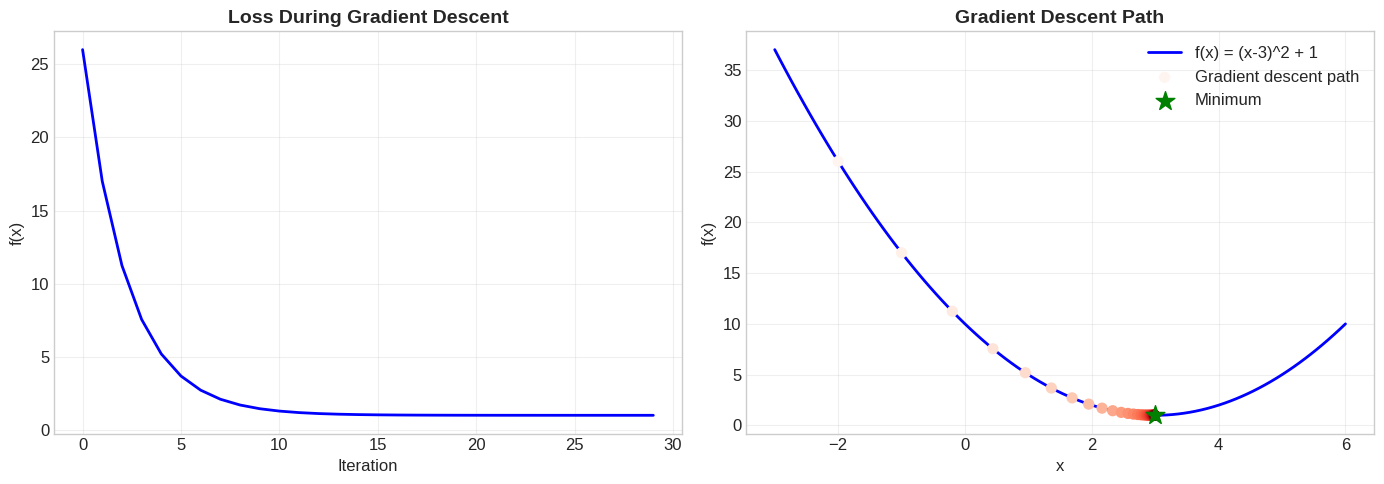

In [ ]:
# ============================================================================
#                    VISUALIZING GRADIENT DESCENT
# ============================================================================

print("\n6. Gradient Descent in Action")
print("="*50)

# Minimize f(x) = (x - 3)^2 + 1
# Minimum at x = 3

x = tf.Variable(-2.0)
learning_rate = 0.1

history = {'x': [], 'f': []}

for i in range(30):
    # Record
    history['x'].append(x.numpy())

    with tf.GradientTape() as tape:
        # Forward pass
        f = (x - 3) ** 2 + 1

    history['f'].append(f.numpy())

    # Compute gradient
    df_dx = tape.gradient(f, x)

    # Gradient descent step
    x.assign_sub(learning_rate * df_dx)  # x = x - lr * gradient

print(f"   Starting x: {history['x'][0]:.2f}")
print(f"   Final x:    {history['x'][-1]:.4f} (target: 3.0)")
print(f"   Final f(x): {history['f'][-1]:.6f} (minimum: 1.0)")

# Visualize
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Loss curve
ax1.plot(history['f'], 'b-', linewidth=2)
ax1.set_xlabel('Iteration', fontsize=12)
ax1.set_ylabel('f(x)', fontsize=12)
ax1.set_title('Loss During Gradient Descent', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)

# Path on function surface
x_range = np.linspace(-3, 6, 100)
f_range = (x_range - 3) ** 2 + 1
ax2.plot(x_range, f_range, 'b-', linewidth=2, label='f(x) = (x-3)^2 + 1')
ax2.scatter(history['x'], history['f'], c=range(len(history['x'])),
            cmap='Reds', s=50, zorder=5, label='Gradient descent path')
ax2.scatter([3], [1], c='green', s=200, marker='*', zorder=6, label='Minimum')
ax2.set_xlabel('x', fontsize=12)
ax2.set_ylabel('f(x)', fontsize=12)
ax2.set_title('Gradient Descent Path', fontsize=14, fontweight='bold')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

---

# Part IV: Neural Network from Scratch (TensorFlow Primitives)

## Rebuilding What We Made in NumPy

Now let's rebuild our neural network using **only basic TensorFlow operations** - no Keras yet!

This helps you understand:
1. How TensorFlow tensors and Variables work
2. How GradientTape eliminates manual backprop
3. What Keras does under the hood

In [ ]:
# ============================================================================
#            ACTIVATION FUNCTIONS (TensorFlow Primitive Style)
# ============================================================================

print("="*60)
print("       ACTIVATION FUNCTIONS (Primitive Style)")
print("="*60)

# We don't need backward methods - GradientTape handles it!

def sigmoid(x):
    """Sigmoid activation: 1 / (1 + exp(-x))"""
    return 1 / (1 + tf.exp(-tf.clip_by_value(x, -500, 500)))

def tanh(x):
    """Hyperbolic tangent activation"""
    return tf.nn.tanh(x)

def relu(x):
    """Rectified Linear Unit: max(0, x)"""
    return tf.maximum(0.0, x)

def leaky_relu(x, alpha=0.01):
    """Leaky ReLU: x if x > 0 else alpha * x"""
    return tf.where(x > 0, x, alpha * x)

def softmax(x):
    """Softmax: exp(x) / sum(exp(x))"""
    exp_x = tf.exp(x - tf.reduce_max(x, axis=-1, keepdims=True))
    return exp_x / tf.reduce_sum(exp_x, axis=-1, keepdims=True)

# Test
x = tf.linspace(-3.0, 3.0, 7)
print(f"\nInput:        {x.numpy()}")
print(f"sigmoid(x):   {[f'{v:.3f}' for v in sigmoid(x).numpy()]}")
print(f"relu(x):      {relu(x).numpy()}")
print(f"leaky_relu:   {[f'{v:.3f}' for v in leaky_relu(x).numpy()]}")

       ACTIVATION FUNCTIONS (Primitive Style)

Input:        [-3. -2. -1.  0.  1.  2.  3.]
sigmoid(x):   ['0.047', '0.119', '0.269', '0.500', '0.731', '0.881', '0.953']
relu(x):      [0. 0. 0. 0. 1. 2. 3.]
leaky_relu:   ['-0.030', '-0.020', '-0.010', '0.000', '1.000', '2.000', '3.000']


In [ ]:
# ============================================================================
#              LOSS FUNCTIONS (TensorFlow Primitive Style)
# ============================================================================

print("="*60)
print("         LOSS FUNCTIONS (Primitive Style)")
print("="*60)

def mse_loss(y_pred, y_true):
    """Mean Squared Error Loss"""
    return tf.reduce_mean((y_pred - y_true) ** 2)

def binary_cross_entropy_loss(y_pred, y_true):
    """Binary Cross-Entropy Loss"""
    epsilon = 1e-15
    y_pred = tf.clip_by_value(y_pred, epsilon, 1 - epsilon)
    return -tf.reduce_mean(
        y_true * tf.math.log(y_pred) +
        (1 - y_true) * tf.math.log(1 - y_pred)
    )

def categorical_cross_entropy_loss(y_pred, y_true):
    """Categorical Cross-Entropy Loss"""
    epsilon = 1e-15
    y_pred = tf.clip_by_value(y_pred, epsilon, 1 - epsilon)
    return -tf.reduce_mean(
        tf.reduce_sum(y_true * tf.math.log(y_pred), axis=-1)
    )

# Test
y_pred = tf.constant([0.9, 0.1, 0.8])
y_true = tf.constant([1.0, 0.0, 1.0])

print(f"\ny_pred: {y_pred.numpy()}")
print(f"y_true: {y_true.numpy()}")
print(f"MSE Loss: {mse_loss(y_pred, y_true).numpy():.6f}")
print(f"BCE Loss: {binary_cross_entropy_loss(y_pred, y_true).numpy():.6f}")

         LOSS FUNCTIONS (Primitive Style)

y_pred: [0.9 0.1 0.8]
y_true: [1. 0. 1.]
MSE Loss: 0.020000
BCE Loss: 0.144622


In [ ]:
# ============================================================================
#          NEURAL NETWORK FROM SCRATCH (TensorFlow Primitives Only)
# ============================================================================

print("="*60)
print("    NEURAL NETWORK (TensorFlow Primitives Only)")
print("="*60)

class NeuralNetworkPrimitive:
    """
    Neural Network using only basic TensorFlow operations.

    NO Keras layers, NO keras.Model!
    Just tf.Variable and GradientTape.

    This demonstrates:
    - Manual parameter management with tf.Variable
    - Forward pass with basic ops
    - GradientTape handling backpropagation
    - Manual gradient descent
    """

    def __init__(self, layer_sizes, activation='relu'):
        """
        Initialize network with given architecture.

        Parameters
        ----------
        layer_sizes : list
            Sizes of each layer, e.g., [2, 16, 8, 1]
        activation : str
            Activation function: 'relu', 'tanh', 'sigmoid'
        """
        self.layer_sizes = layer_sizes
        self.activation_name = activation

        # Select activation function
        self.activation = {
            'relu': relu,
            'tanh': tanh,
            'sigmoid': sigmoid,
            'leaky_relu': leaky_relu
        }[activation]

        # Initialize weights and biases as tf.Variable
        # Using He initialization: W ~ N(0, sqrt(2/n_in))
        self.weights = []
        self.biases = []

        for i in range(len(layer_sizes) - 1):
            n_in, n_out = layer_sizes[i], layer_sizes[i + 1]

            # He initialization
            W = tf.Variable(
                tf.random.normal((n_in, n_out)) * tf.sqrt(2.0 / n_in),
                trainable=True,
                name=f'W{i}'
            )
            b = tf.Variable(
                tf.zeros((n_out,)),
                trainable=True,
                name=f'b{i}'
            )

            self.weights.append(W)
            self.biases.append(b)

        self.history = {'loss': [], 'accuracy': []}

    def forward(self, X):
        """
        Forward pass through the network.

        For each layer:
        1. Linear transformation: Z = X @ W + b
        2. Activation (except last layer): A = activation(Z)
        """
        out = X

        # Hidden layers with activation
        for i in range(len(self.weights) - 1):
            out = out @ self.weights[i] + self.biases[i]
            out = self.activation(out)

        # Output layer (no activation for now)
        out = out @ self.weights[-1] + self.biases[-1]

        return out

    @property
    def trainable_variables(self):
        """Return all trainable parameters."""
        return self.weights + self.biases

    def fit(self, X, y, epochs=100, learning_rate=0.01, loss_fn='mse', verbose=True):
        """
        Train the network using gradient descent.

        The beauty: We don't need to implement backprop!
        GradientTape does it automatically.
        """
        # Convert to tensors if needed
        X = tf.cast(X, tf.float32)
        y = tf.cast(y, tf.float32)

        # Select loss function
        loss_functions = {
            'mse': mse_loss,
            'bce': binary_cross_entropy_loss,
            'cce': categorical_cross_entropy_loss
        }
        compute_loss = loss_functions[loss_fn]

        for epoch in range(epochs):
            # ----- Forward Pass with GradientTape -----
            with tf.GradientTape() as tape:
                y_pred = self.forward(X)

                # Apply sigmoid for binary classification
                if loss_fn == 'bce':
                    y_pred = sigmoid(y_pred)
                elif loss_fn == 'cce':
                    y_pred = softmax(y_pred)

                loss = compute_loss(y_pred, y)

            self.history['loss'].append(loss.numpy())

            # ----- Backward Pass (AUTOMATIC!) -----
            gradients = tape.gradient(loss, self.trainable_variables)

            # ----- Gradient Descent Update -----
            for param, grad in zip(self.trainable_variables, gradients):
                param.assign_sub(learning_rate * grad)

            # Compute accuracy
            if loss_fn == 'bce':
                predictions = tf.cast(y_pred > 0.5, tf.float32)
                accuracy = tf.reduce_mean(tf.cast(predictions == y, tf.float32)).numpy()
            elif loss_fn == 'cce':
                predictions = tf.argmax(y_pred, axis=-1)
                targets = tf.argmax(y, axis=-1)
                accuracy = tf.reduce_mean(tf.cast(predictions == targets, tf.float32)).numpy()
            else:
                accuracy = 0
            self.history['accuracy'].append(accuracy)

            # Print progress
            if verbose and (epoch + 1) % max(1, epochs // 10) == 0:
                print(f"Epoch {epoch+1:4d}/{epochs} | Loss: {loss.numpy():.6f} | Acc: {accuracy:.4f}")

        return self.history

    def predict(self, X):
        """Make predictions."""
        return self.forward(tf.cast(X, tf.float32))

    def summary(self):
        """Print network summary."""
        print("\n" + "="*50)
        print("        NETWORK SUMMARY (Primitive)")
        print("="*50)
        total_params = 0
        for i, (W, b) in enumerate(zip(self.weights, self.biases)):
            params = tf.size(W).numpy() + tf.size(b).numpy()
            total_params += params
            print(f"Layer {i+1}: {W.shape[0]} -> {W.shape[1]} | Params: {params}")
        print("-"*50)
        print(f"Total Parameters: {total_params}")
        print(f"Activation: {self.activation_name}")
        print("="*50)


print("\nNeuralNetworkPrimitive class created!")
print("Uses only: tf.Variable, basic ops, and GradientTape")

    NEURAL NETWORK (TensorFlow Primitives Only)

NeuralNetworkPrimitive class created!
Uses only: tf.Variable, basic ops, and GradientTape



        TEST: XOR PROBLEM (Primitive Network)

        NETWORK SUMMARY (Primitive)
Layer 1: 2 -> 8 | Params: 24
Layer 2: 8 -> 1 | Params: 9
--------------------------------------------------
Total Parameters: 33
Activation: tanh

Training...

Epoch  100/1000 | Loss: 0.122373 | Acc: 1.0000
Epoch  200/1000 | Loss: 0.035921 | Acc: 1.0000
Epoch  300/1000 | Loss: 0.019631 | Acc: 1.0000
Epoch  400/1000 | Loss: 0.013275 | Acc: 1.0000
Epoch  500/1000 | Loss: 0.009957 | Acc: 1.0000
Epoch  600/1000 | Loss: 0.007937 | Acc: 1.0000
Epoch  700/1000 | Loss: 0.006584 | Acc: 1.0000
Epoch  800/1000 | Loss: 0.005617 | Acc: 1.0000
Epoch  900/1000 | Loss: 0.004893 | Acc: 1.0000
Epoch 1000/1000 | Loss: 0.004332 | Acc: 1.0000

----------------------------------------
PREDICTIONS
----------------------------------------
Input: [0. 0.] | True: 0 | Pred: 0.0008 | Rounded: 0
Input: [0. 1.] | True: 1 | Pred: 0.9961 | Rounded: 1
Input: [1. 0.] | True: 1 | Pred: 0.9945 | Rounded: 1
Input: [1. 1.] | True: 0 | Pred:

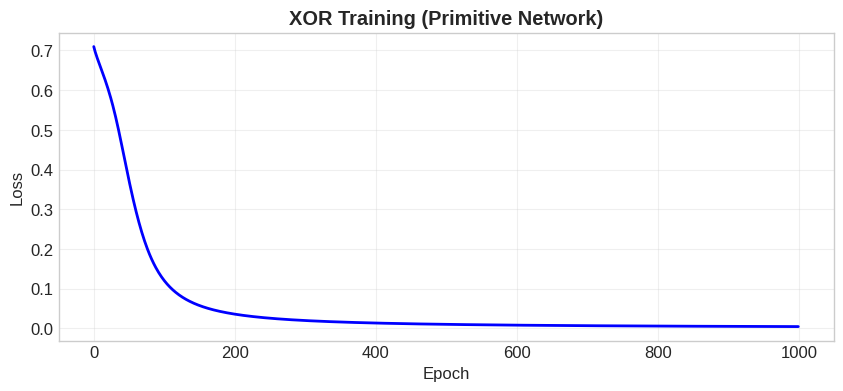

In [ ]:
# ============================================================================
#                    TEST: XOR PROBLEM (Primitives)
# ============================================================================

print("\n" + "="*60)
print("        TEST: XOR PROBLEM (Primitive Network)")
print("="*60)

# XOR dataset
X_xor = tf.constant([[0., 0.], [0., 1.], [1., 0.], [1., 1.]])
y_xor = tf.constant([[0.], [1.], [1.], [0.]])

# Create and train network
tf.random.set_seed(42)
xor_net = NeuralNetworkPrimitive(
    layer_sizes=[2, 8, 1],
    activation='tanh'
)
xor_net.summary()

print("\nTraining...\n")
history = xor_net.fit(
    X_xor, y_xor,
    epochs=1000,
    learning_rate=0.5,
    loss_fn='bce',
    verbose=True
)

# Test predictions
print("\n" + "-"*40)
print("PREDICTIONS")
print("-"*40)

predictions = sigmoid(xor_net.predict(X_xor))
for x, y_true, y_pred in zip(X_xor.numpy(), y_xor.numpy(), predictions.numpy()):
    print(f"Input: {x} | True: {y_true[0]:.0f} | Pred: {y_pred[0]:.4f} | Rounded: {round(y_pred[0])}")

# Plot training
plt.figure(figsize=(10, 4))
plt.plot(history['loss'], 'b-', linewidth=2)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('XOR Training (Primitive Network)', fontweight='bold')
plt.grid(True, alpha=0.3)
plt.show()

---

# Part V: The High-Level Keras API

## Keras 3 - The Elegant Abstraction

Now that you understand the primitives, let's see how **Keras 3** makes everything cleaner:

| Primitive Approach | Keras Approach |
|-------------------|----------------|
| Manual weight init | `layers.Dense` handles it |
| Manual parameter list | `model.trainable_variables` |
| Manual GradientTape | `model.fit()` handles it |
| Manual updates | Built into optimizers |
| Manual device management | Automatic |

### Keras 3 New Features

- **Multi-backend**: Works with TensorFlow, JAX, and PyTorch!
- **Cleaner API**: More Pythonic and intuitive
- **Better performance**: Optimized graph compilation

In [ ]:
# ============================================================================
#                         layers.Dense EXPLAINED
# ============================================================================

print("="*60)
print("              layers.Dense EXPLAINED")
print("="*60)

# layers.Dense is a fully connected layer
# It does: output = activation(input @ kernel + bias)

dense = layers.Dense(units=2, input_shape=(3,))

# Build the layer by passing some input
x = tf.constant([[1., 2., 3.]])
output = dense(x)

print(f"\nlayers.Dense(2, input_shape=(3,)):")
print(f"  Kernel (weights) shape: {dense.kernel.shape}  (in_features x out_features)")
print(f"  Bias shape:             {dense.bias.shape}     (out_features)")
print(f"\n  Kernel:\n{dense.kernel.numpy()}")
print(f"\n  Bias: {dense.bias.numpy()}")

print(f"\n  Input:  {x.numpy()}")
print(f"  Output: {output.numpy()}")

# Verify: output = x @ kernel + bias
manual_output = x @ dense.kernel + dense.bias
print(f"  Manual: {manual_output.numpy()}")
print(f"  Match:  {tf.reduce_all(tf.abs(output - manual_output) < 1e-6).numpy()}")

              layers.Dense EXPLAINED

layers.Dense(2, input_shape=(3,)):
  Kernel (weights) shape: (3, 2)  (in_features x out_features)
  Bias shape:             (2,)     (out_features)

  Kernel:
[[-0.82601786 -0.493322  ]
 [-1.0536867   0.33408475]
 [ 1.00472     0.9196601 ]]

  Bias: [0. 0.]

  Input:  [[1. 2. 3.]]
  Output: [[0.08076859 2.9338279 ]]
  Manual: [[0.08076859 2.9338279 ]]
  Match:  True


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# ============================================================================
#                    keras.Sequential: THE EASY WAY
# ============================================================================

print("="*60)
print("           keras.Sequential: THE EASY WAY")
print("="*60)

# Sequential is the simplest way to build a model
# Just stack layers in order!

sequential_model = Sequential([
    layers.Dense(16, activation='relu', input_shape=(2,)),
    layers.Dense(8, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

print("\nModel created with Sequential:")
sequential_model.summary()

# Alternative: build incrementally
model2 = Sequential()
model2.add(layers.Dense(16, activation='relu', input_shape=(2,)))
model2.add(layers.Dense(8, activation='relu'))
model2.add(layers.Dense(1, activation='sigmoid'))

print("\n Both approaches create identical architectures!")

           keras.Sequential: THE EASY WAY

Model created with Sequential:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 16)             │            48 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 193 (772.00 B)

 Trainable params: 193 (772.00 B)

 Non-trainable params: 0 (0.00 B)


 Both approaches create identical architectures!


In [ ]:
# ============================================================================
#                    FUNCTIONAL API: MORE FLEXIBILITY
# ============================================================================

print("="*60)
print("         FUNCTIONAL API: MORE FLEXIBILITY")
print("="*60)

# The Functional API allows:
# - Multiple inputs/outputs
# - Shared layers
# - Non-linear topology (skip connections, etc.)

# Define input
inputs = keras.Input(shape=(2,), name='input_layer')

# Build the graph
x = layers.Dense(16, activation='relu', name='hidden_1')(inputs)
x = layers.Dense(8, activation='relu', name='hidden_2')(x)
outputs = layers.Dense(1, activation='sigmoid', name='output')(x)

# Create model
functional_model = Model(inputs=inputs, outputs=outputs, name='functional_model')

print("\nModel created with Functional API:")
functional_model.summary()

# Example: Model with skip connection (ResNet-style)
print("\n" + "-"*40)
print("Example: Skip Connection")
print("-"*40)

inputs = keras.Input(shape=(16,))
x = layers.Dense(16, activation='relu')(inputs)
x = layers.Dense(16, activation='relu')(x)
# Skip connection: add input to output
outputs = layers.Add()([inputs, x])

skip_model = Model(inputs, outputs, name='skip_connection_model')
skip_model.summary()

         FUNCTIONAL API: MORE FLEXIBILITY

Model created with Functional API:


Model: "functional_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_1 (Dense)                │ (None, 16)             │            48 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_2 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 193 (772.00 B)

 Trainable params: 193 (772.00 B)

 Non-trainable params: 0 (0.00 B)


----------------------------------------
Example: Skip Connection
----------------------------------------


Model: "skip_connection_model"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 16)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_7 (Dense)     │ (None, 16)        │        272 │ input_layer_2[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_8 (Dense)     │ (None, 16)        │        272 │ dense_7[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 16)        │          0 │ input_layer_2[0]… │
│                     │                   │            │ dense_8[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 544 (2.12 KB)

 Trainable params: 544 (2.12 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# ============================================================================
#                    SUBCLASSING: MAXIMUM CONTROL
# ============================================================================

print("="*60)
print("          SUBCLASSING: MAXIMUM CONTROL")
print("="*60)

class CustomModel(keras.Model):
    """
    Custom model using subclassing.

    This gives you:
    - Full Python control flow in forward pass
    - Custom training loops if needed
    - Easy debugging
    """

    def __init__(self, hidden_units, output_units):
        super().__init__()

        # Define layers
        self.dense1 = layers.Dense(hidden_units, activation='relu')
        self.dense2 = layers.Dense(hidden_units, activation='relu')
        self.output_layer = layers.Dense(output_units, activation='sigmoid')
        self.dropout = layers.Dropout(0.2)

    def call(self, inputs, training=False):
        """
        Forward pass.

        The 'training' argument controls dropout behavior.
        """
        x = self.dense1(inputs)
        x = self.dropout(x, training=training)  # Only dropout during training
        x = self.dense2(x)
        x = self.dropout(x, training=training)
        return self.output_layer(x)


# Create model
custom_model = CustomModel(hidden_units=16, output_units=1)

# Build by calling with sample input
sample_input = tf.random.normal((1, 2))
_ = custom_model(sample_input)

print("\nCustom Model (Subclassed):")
custom_model.summary()

print("\n Three Ways to Build Keras Models:")
print(" 1. Sequential - Simple stacks of layers")
print(" 2. Functional - Graph with multiple inputs/outputs")
print(" 3. Subclassing - Maximum flexibility and control")

          SUBCLASSING: MAXIMUM CONTROL

Custom Model (Subclassed):


Model: "custom_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (1, 16)                │            48 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (1, 16)                │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (1, 1)                 │            17 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 337 (1.32 KB)

 Trainable params: 337 (1.32 KB)

 Non-trainable params: 0 (0.00 B)


 Three Ways to Build Keras Models:
 1. Sequential - Simple stacks of layers
 2. Functional - Graph with multiple inputs/outputs
 3. Subclassing - Maximum flexibility and control


In [ ]:
# ============================================================================
#                    COMPILING AND TRAINING
# ============================================================================

print("="*60)
print("              COMPILING AND TRAINING")
print("="*60)

# Create a model
model = Sequential([
    layers.Dense(16, activation='relu', input_shape=(2,)),
    layers.Dense(8, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Compile: configure the training process
model.compile(
    optimizer='adam',                    # or keras.optimizers.Adam(learning_rate=0.001)
    loss='binary_crossentropy',          # or keras.losses.BinaryCrossentropy()
    metrics=['accuracy']                 # Track accuracy during training
)

print("\nModel compiled with:")
print(f"  Optimizer: {model.optimizer.__class__.__name__}")
print(f"  Loss:      {model.loss}")
print(f"  Metrics:   {[m.name for m in model.metrics]}")

print("\n Common Optimizers:")
print("  - 'sgd' or keras.optimizers.SGD()")
print("  - 'adam' or keras.optimizers.Adam() [Most popular!]")
print("  - 'rmsprop' or keras.optimizers.RMSprop()")
print("  - 'adamw' or keras.optimizers.AdamW() [Adam + weight decay]")

print("\n Common Losses:")
print("  - 'mse' - Mean Squared Error (regression)")
print("  - 'binary_crossentropy' - Binary classification")
print("  - 'categorical_crossentropy' - Multi-class (one-hot)")
print("  - 'sparse_categorical_crossentropy' - Multi-class (integer labels)")

              COMPILING AND TRAINING

Model compiled with:
  Optimizer: Adam
  Loss:      binary_crossentropy
  Metrics:   ['loss', 'compile_metrics']

 Common Optimizers:
  - 'sgd' or keras.optimizers.SGD()
  - 'adam' or keras.optimizers.Adam() [Most popular!]
  - 'rmsprop' or keras.optimizers.RMSprop()
  - 'adamw' or keras.optimizers.AdamW() [Adam + weight decay]

 Common Losses:
  - 'mse' - Mean Squared Error (regression)
  - 'binary_crossentropy' - Binary classification
  - 'categorical_crossentropy' - Multi-class (one-hot)
  - 'sparse_categorical_crossentropy' - Multi-class (integer labels)


In [ ]:
# ============================================================================
#                    DYNAMIC ARCHITECTURE BUILDER
# ============================================================================

print("="*60)
print("         DYNAMIC ARCHITECTURE BUILDER")
print("="*60)

def create_mlp(
    layer_sizes,
    activation='relu',
    output_activation='sigmoid',
    dropout_rate=0.0,
    batch_norm=False
):
    """
    Create a Multi-Layer Perceptron with given architecture.

    Parameters
    ----------
    layer_sizes : list
        e.g., [784, 256, 128, 10] for MNIST
    activation : str
        Activation for hidden layers
    output_activation : str
        Activation for output layer
    dropout_rate : float
        Dropout rate (0 to disable)
    batch_norm : bool
        Whether to use batch normalization
    """
    model = Sequential()

    # Input layer
    model.add(layers.Input(shape=(layer_sizes[0],)))

    # Hidden layers
    for units in layer_sizes[1:-1]:
        model.add(layers.Dense(units))
        if batch_norm:
            model.add(layers.BatchNormalization())
        model.add(layers.Activation(activation))
        if dropout_rate > 0:
            model.add(layers.Dropout(dropout_rate))

    # Output layer
    model.add(layers.Dense(layer_sizes[-1], activation=output_activation))

    return model


# Create different architectures
small_net = create_mlp([2, 8, 1])
medium_net = create_mlp([784, 256, 128, 10], output_activation='softmax')
deep_net = create_mlp(
    [100, 64, 64, 64, 10],
    activation='relu',
    output_activation='softmax',
    dropout_rate=0.2,
    batch_norm=True
)

print("\nSmall net (2->8->1):")
small_net.summary()

print("\nDeep net with dropout and batch norm:")
deep_net.summary()

         DYNAMIC ARCHITECTURE BUILDER

Small net (2->8->1):


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                │ (None, 8)              │            24 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33 (132.00 B)

 Trainable params: 33 (132.00 B)

 Non-trainable params: 0 (0.00 B)


Deep net with dropout and batch norm:


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_20 (Dense)                │ (None, 64)             │         6,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,202 (63.29 KB)

 Trainable params: 15,818 (61.79 KB)

 Non-trainable params: 384 (1.50 KB)

---

# Part VI: Complete Training Examples

## Let's Put It All Together!

           DEMO 1: XOR (High-Level API)

Training...

----------------------------------------
PREDICTIONS
----------------------------------------
Input: [0. 0.] | True: 0 | Pred: 0.0000
Input: [0. 1.] | True: 1 | Pred: 0.9999
Input: [1. 0.] | True: 1 | Pred: 0.9999
Input: [1. 1.] | True: 0 | Pred: 0.0001

Final accuracy: 1.0000


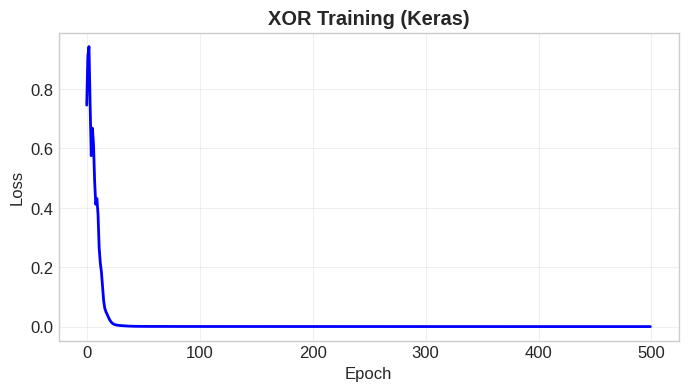

In [ ]:
# ============================================================================
#                      DEMO 1: XOR (High-Level API)
# ============================================================================

print("="*60)
print("           DEMO 1: XOR (High-Level API)")
print("="*60)

# Data
X_xor = np.array([[0., 0.], [0., 1.], [1., 0.], [1., 1.]])
y_xor = np.array([[0.], [1.], [1.], [0.]])

# Model
tf.random.set_seed(42)
xor_model = Sequential([
    layers.Dense(8, activation='tanh', input_shape=(2,)),
    layers.Dense(1, activation='sigmoid')
])

# Compile
xor_model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.5),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Train
print("\nTraining...")
history = xor_model.fit(
    X_xor, y_xor,
    epochs=500,
    verbose=0  # Silent training
)

# Results
print("\n" + "-"*40)
print("PREDICTIONS")
print("-"*40)
predictions = xor_model.predict(X_xor, verbose=0)
for x, y_true, y_pred in zip(X_xor, y_xor, predictions):
    print(f"Input: {x} | True: {y_true[0]:.0f} | Pred: {y_pred[0]:.4f}")

print(f"\nFinal accuracy: {history.history['accuracy'][-1]:.4f}")

# Plot
plt.figure(figsize=(8, 4))
plt.plot(history.history['loss'], 'b-', linewidth=2)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('XOR Training (Keras)', fontweight='bold')
plt.grid(True, alpha=0.3)
plt.show()

           DEMO 2: MOONS CLASSIFICATION

Training...


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Final train accuracy: 0.9675
Final val accuracy:   0.9800


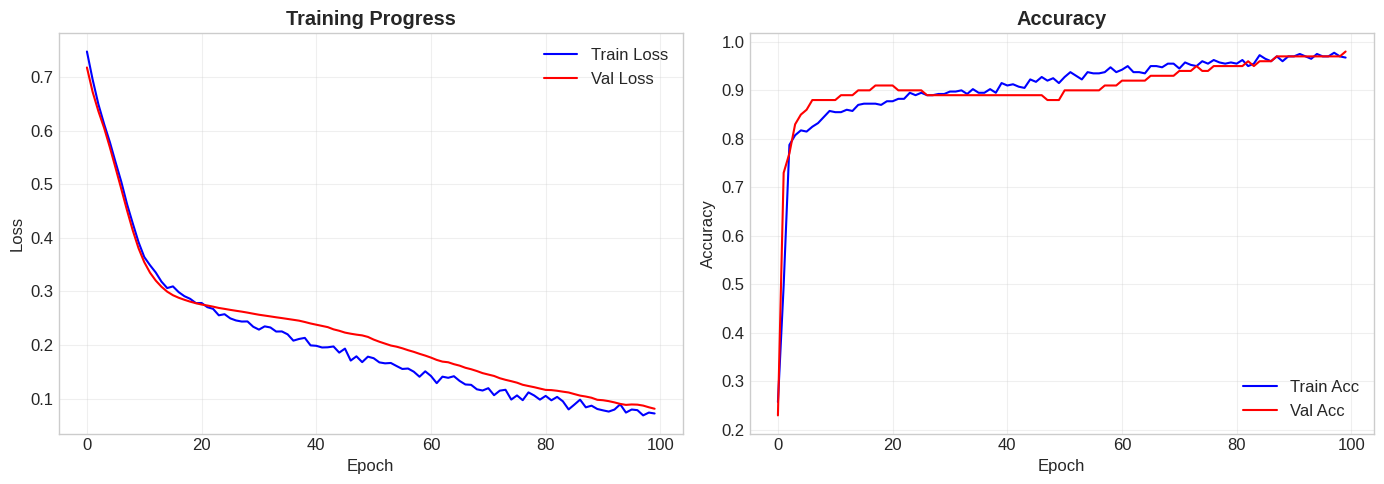

In [ ]:
# ============================================================================
#                   DEMO 2: MOONS CLASSIFICATION
# ============================================================================

print("="*60)
print("           DEMO 2: MOONS CLASSIFICATION")
print("="*60)

from sklearn.model_selection import train_test_split

# Generate moons dataset
def make_moons(n_samples=500, noise=0.1):
    n_per_class = n_samples // 2

    # Moon 1
    theta1 = np.linspace(0, np.pi, n_per_class)
    x1 = np.column_stack([np.cos(theta1), np.sin(theta1)])

    # Moon 2
    theta2 = np.linspace(0, np.pi, n_per_class)
    x2 = np.column_stack([1 - np.cos(theta2), 0.5 - np.sin(theta2)])

    X = np.vstack([x1, x2]) + np.random.randn(n_samples, 2) * noise
    y = np.concatenate([np.zeros(n_per_class), np.ones(n_per_class)])

    return X.astype(np.float32), y.astype(np.float32).reshape(-1, 1)

# Data
X_moons, y_moons = make_moons(500, noise=0.15)

# Split with shuffling
X_train, X_val, y_train, y_val = train_test_split(
    X_moons, y_moons, test_size=0.2, random_state=42, shuffle=True
)

# Model
tf.random.set_seed(42)
moon_model = Sequential([
    layers.Dense(32, activation='relu', input_shape=(2,)),
    layers.Dropout(0.1),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

moon_model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Train
print("\nTraining...")
history = moon_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100,
    batch_size=32,
    verbose=0
)

print(f"Final train accuracy: {history.history['accuracy'][-1]:.4f}")
print(f"Final val accuracy:   {history.history['val_accuracy'][-1]:.4f}")

# Plot training history
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

ax1.plot(history.history['loss'], 'b-', label='Train Loss')
ax1.plot(history.history['val_loss'], 'r-', label='Val Loss')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.set_title('Training Progress', fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)

ax2.plot(history.history['accuracy'], 'b-', label='Train Acc')
ax2.plot(history.history['val_accuracy'], 'r-', label='Val Acc')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
ax2.set_title('Accuracy', fontweight='bold')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

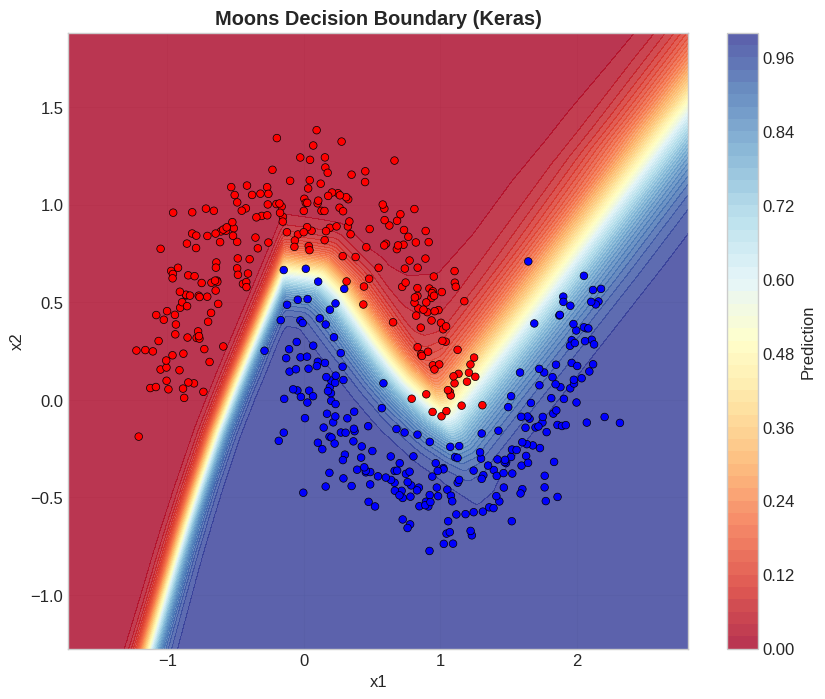

In [ ]:
# ============================================================================
#                VISUALIZE MOONS DECISION BOUNDARY
# ============================================================================

def plot_decision_boundary_keras(model, X, y, title="Decision Boundary"):
    """Visualize how the network partitions the input space."""
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))

    grid = np.c_[xx.ravel(), yy.ravel()].astype(np.float32)
    Z = model.predict(grid, verbose=0).reshape(xx.shape)

    plt.figure(figsize=(10, 8))
    plt.contourf(xx, yy, Z, levels=50, cmap='RdYlBu', alpha=0.8)
    plt.colorbar(label='Prediction')

    colors = ['red' if label == 0 else 'blue' for label in y.flatten()]
    plt.scatter(X[:, 0], X[:, 1], c=colors, s=30, edgecolors='black', linewidth=0.5)

    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title(title, fontweight='bold')
    plt.grid(True, alpha=0.3)
    plt.show()

plot_decision_boundary_keras(moon_model, X_moons, y_moons, "Moons Decision Boundary (Keras)")

           DEMO 3: DIGIT CLASSIFICATION
Training samples: 1437
Test samples:     360
Features:         64
Classes:          10 (digits 0-9)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_29 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,226 (67.29 KB)

 Trainable params: 17,226 (67.29 KB)

 Non-trainable params: 0 (0.00 B)


Training...

Test Accuracy: 98.33%


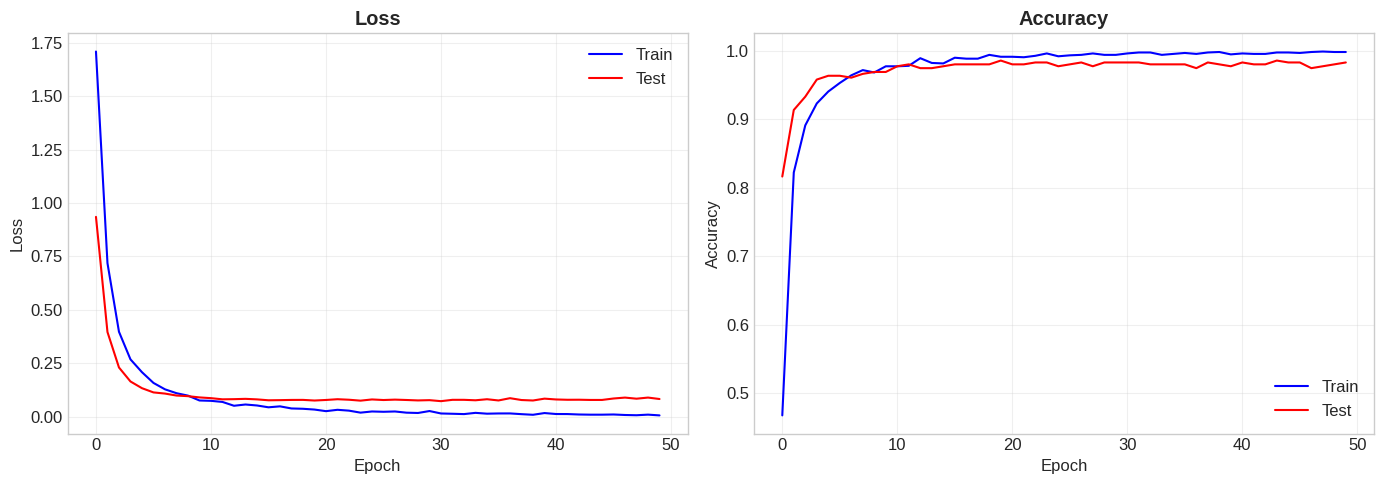

In [ ]:
# ============================================================================
#                   DEMO 3: DIGIT CLASSIFICATION
# ============================================================================

print("="*60)
print("           DEMO 3: DIGIT CLASSIFICATION")
print("="*60)

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load data
digits = load_digits()
X, y = digits.data, digits.target

# Normalize
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Training samples: {X_train.shape[0]}")
print(f"Test samples:     {X_test.shape[0]}")
print(f"Features:         {X_train.shape[1]}")
print(f"Classes:          10 (digits 0-9)")

# Model for multi-class classification
tf.random.set_seed(42)
digit_model = Sequential([
    layers.Dense(128, activation='relu', input_shape=(64,)),
    layers.Dropout(0.2),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')  # 10 classes
])

digit_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',  # Integer labels!
    metrics=['accuracy']
)

digit_model.summary()

# Train with callbacks
print("\nTraining...")
history = digit_model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50,
    batch_size=32,
    verbose=0
)

# Evaluate
test_loss, test_acc = digit_model.evaluate(X_test, y_test, verbose=0)
print(f"\nTest Accuracy: {test_acc*100:.2f}%")

# Plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

ax1.plot(history.history['loss'], 'b-', label='Train')
ax1.plot(history.history['val_loss'], 'r-', label='Test')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.set_title('Loss', fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)

ax2.plot(history.history['accuracy'], 'b-', label='Train')
ax2.plot(history.history['val_accuracy'], 'r-', label='Test')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
ax2.set_title('Accuracy', fontweight='bold')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

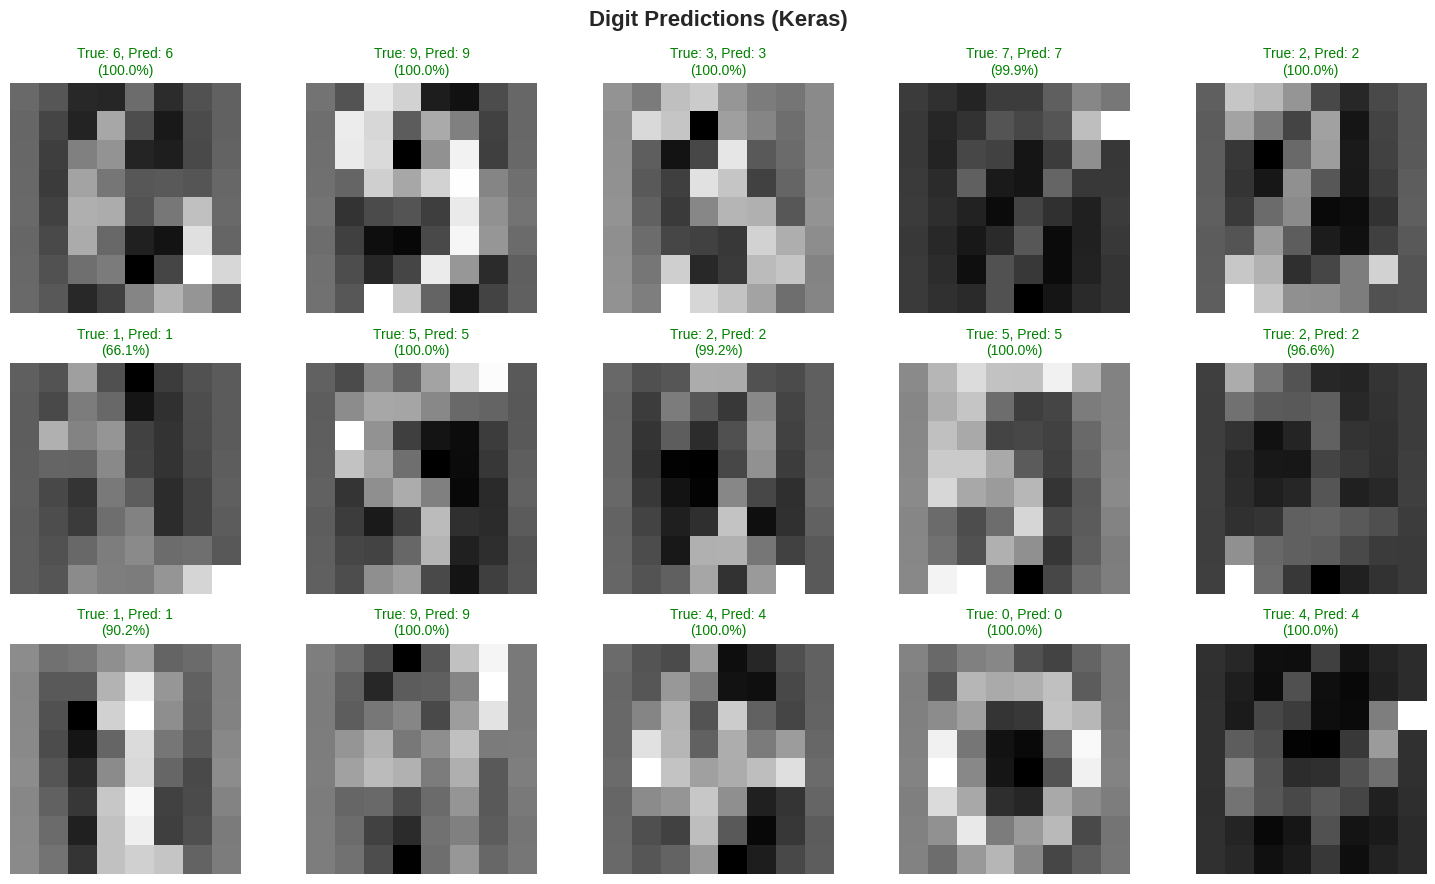

In [ ]:
# ============================================================================
#                    VISUALIZE DIGIT PREDICTIONS
# ============================================================================

# Show predictions
fig, axes = plt.subplots(3, 5, figsize=(15, 9))
fig.suptitle('Digit Predictions (Keras)', fontsize=16, fontweight='bold')

predictions = digit_model.predict(X_test, verbose=0)
pred_classes = np.argmax(predictions, axis=1)

for i, ax in enumerate(axes.flatten()):
    img = X_test[i].reshape(8, 8)
    true_label = y_test[i]
    pred_label = pred_classes[i]
    confidence = predictions[i][pred_label] * 100

    ax.imshow(img, cmap='gray')
    color = 'green' if true_label == pred_label else 'red'
    ax.set_title(f'True: {true_label}, Pred: {pred_label}\n({confidence:.1f}%)',
                 color=color, fontsize=10)
    ax.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
# ============================================================================
#                    CALLBACKS: POWERFUL TRAINING CONTROL
# ============================================================================

print("="*60)
print("         CALLBACKS: POWERFUL TRAINING CONTROL")
print("="*60)

# Keras callbacks allow you to:
# - Save best model
# - Early stopping
# - Learning rate scheduling
# - Custom actions during training

# Example with callbacks
callbacks = [
    # Stop if validation loss doesn't improve for 10 epochs
    keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True
    ),
    # Reduce learning rate when stuck
    keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=5,
        min_lr=1e-6
    )
]

print("\nCommon Callbacks:")
print(" - EarlyStopping: Stop when metric stops improving")
print(" - ModelCheckpoint: Save best model during training")
print(" - ReduceLROnPlateau: Reduce LR when stuck")
print(" - TensorBoard: Visualize training in browser")
print(" - LearningRateScheduler: Custom LR schedules")

print("\n Example usage:")
print(" model.fit(X, y, callbacks=[EarlyStopping(...), ...])")

         CALLBACKS: POWERFUL TRAINING CONTROL

Common Callbacks:
 - EarlyStopping: Stop when metric stops improving
 - ModelCheckpoint: Save best model during training
 - ReduceLROnPlateau: Reduce LR when stuck
 - TensorBoard: Visualize training in browser
 - LearningRateScheduler: Custom LR schedules

 Example usage:
 model.fit(X, y, callbacks=[EarlyStopping(...), ...])


---

# Part VII: Comparison & Best Practices

## NumPy vs TensorFlow Primitives vs Keras

In [ ]:
# ============================================================================
#                     COMPARISON SUMMARY
# ============================================================================

print("="*70)
print("              COMPARISON: THREE APPROACHES")
print("="*70)

comparison = """
ASPECT                  NumPy              TF Primitives         Keras
--------------------------------------------------------------------------------
Backpropagation         Manual             GradientTape          Automatic
GPU/TPU Support         No                 Yes                   Yes
Weight Management       Manual lists       tf.Variable           Auto-collected
Gradient Computation    Manual             tape.gradient()       model.fit()
Weight Updates          Manual             assign_sub()          optimizer.apply
Code Complexity         High               Medium                Low
Flexibility             Maximum            High                  High
Learning Value          Excellent          Excellent             Good for prod
Production Use          No                 Sometimes             Yes
Deployment Options      None               TF Serving            TF Serving, Lite
"""
print(comparison)

              COMPARISON: THREE APPROACHES

ASPECT                  NumPy              TF Primitives         Keras
--------------------------------------------------------------------------------
Backpropagation         Manual             GradientTape          Automatic
GPU/TPU Support         No                 Yes                   Yes
Weight Management       Manual lists       tf.Variable           Auto-collected
Gradient Computation    Manual             tape.gradient()       model.fit()
Weight Updates          Manual             assign_sub()          optimizer.apply
Code Complexity         High               Medium                Low
Flexibility             Maximum            High                  High
Learning Value          Excellent          Excellent             Good for prod
Production Use          No                 Sometimes             Yes
Deployment Options      None               TF Serving            TF Serving, Lite



In [ ]:
# ============================================================================
#                     KERAS vs PYTORCH COMPARISON
# ============================================================================

print("="*70)
print("              KERAS vs PYTORCH")
print("="*70)

keras_vs_pytorch = """
ASPECT                  Keras/TensorFlow           PyTorch
--------------------------------------------------------------------------------
Define-and-Run          @tf.function (graphs)      Eager by default
Auto-Differentiation    GradientTape               autograd (automatic)
Variables               tf.Variable                requires_grad=True
Training                model.fit()                Manual loop
Model Definition        Sequential/Functional      nn.Module
Production              TF Serving, TFLite         TorchServe, ONNX
Mobile                  TensorFlow Lite            PyTorch Mobile
Research Popularity     Declining                  Growing
Industry Adoption       Google, enterprise         Meta, research
Multi-backend           Keras 3 (TF, JAX, PyTorch) No

KEY INSIGHT: Keras 3 can now use PyTorch as a backend!
             keras.backend.set_backend('torch')
"""
print(keras_vs_pytorch)

              KERAS vs PYTORCH

ASPECT                  Keras/TensorFlow           PyTorch
--------------------------------------------------------------------------------
Define-and-Run          @tf.function (graphs)      Eager by default
Auto-Differentiation    GradientTape               autograd (automatic)
Variables               tf.Variable                requires_grad=True
Training                model.fit()                Manual loop
Model Definition        Sequential/Functional      nn.Module
Production              TF Serving, TFLite         TorchServe, ONNX
Mobile                  TensorFlow Lite            PyTorch Mobile
Research Popularity     Declining                  Growing
Industry Adoption       Google, enterprise         Meta, research
Multi-backend           Keras 3 (TF, JAX, PyTorch) No

KEY INSIGHT: Keras 3 can now use PyTorch as a backend!
             keras.backend.set_backend('torch')



In [ ]:
# ============================================================================
#                         BEST PRACTICES
# ============================================================================

print("="*70)
print("                    BEST PRACTICES")
print("="*70)

best_practices = """
1. DATA PREPROCESSING
   - Normalize inputs (StandardScaler, MinMaxScaler)
   - Use tf.data.Dataset for large datasets
   - Prefetch and cache for performance

2. MODEL DESIGN
   - Start simple, add complexity as needed
   - Use Dropout for regularization
   - BatchNormalization can speed up training
   - ReLU for hidden layers (usually)

3. TRAINING
   - Use callbacks (EarlyStopping, ModelCheckpoint)
   - Monitor validation metrics
   - Use learning rate schedules
   - Adam optimizer is a good default

4. DEBUGGING
   - Check shapes at each layer
   - Verify loss is decreasing
   - Watch for overfitting (val_loss increasing)
   - Use model.summary() to inspect architecture

5. DEPLOYMENT
   - Save model: model.save('model.keras')
   - Load model: keras.models.load_model('model.keras')
   - TFLite for mobile: tf.lite.TFLiteConverter
   - TF Serving for production APIs
"""
print(best_practices)

                    BEST PRACTICES

1. DATA PREPROCESSING
   - Normalize inputs (StandardScaler, MinMaxScaler)
   - Use tf.data.Dataset for large datasets
   - Prefetch and cache for performance

2. MODEL DESIGN
   - Start simple, add complexity as needed
   - Use Dropout for regularization
   - BatchNormalization can speed up training
   - ReLU for hidden layers (usually)

3. TRAINING
   - Use callbacks (EarlyStopping, ModelCheckpoint)
   - Monitor validation metrics
   - Use learning rate schedules
   - Adam optimizer is a good default

4. DEBUGGING
   - Check shapes at each layer
   - Verify loss is decreasing
   - Watch for overfitting (val_loss increasing)
   - Use model.summary() to inspect architecture

5. DEPLOYMENT
   - Save model: model.save('model.keras')
   - Load model: keras.models.load_model('model.keras')
   - TFLite for mobile: tf.lite.TFLiteConverter
   - TF Serving for production APIs



In [ ]:
# ============================================================================
#                         CHEAT SHEET
# ============================================================================

print("="*70)
print("              TENSORFLOW/KERAS CHEAT SHEET")
print("="*70)

cheat_sheet = """
TENSORS
-------
tf.constant([1,2,3])            # Immutable tensor
tf.Variable([1,2,3])            # Mutable (trainable) tensor
tf.zeros((2, 3))                # Zeros
tf.ones((2, 3))                 # Ones
tf.random.normal((2, 3))        # Normal distribution
tf.random.uniform((2, 3))       # Uniform [0, 1)
tensor.numpy()                  # To NumPy
tf.cast(x, tf.float32)          # Change dtype

OPERATIONS
----------
x + y, x - y, x * y, x / y      # Element-wise
x @ y, tf.matmul(x, y)          # Matrix multiplication
tf.transpose(x)                 # Transpose
tf.reshape(x, (2, -1))          # Reshape
tf.expand_dims(x, 0)            # Add dimension
tf.squeeze(x)                   # Remove size-1 dims
tf.concat([x, y], axis=0)       # Concatenate
tf.reduce_sum(x, axis=0)        # Sum along axis
tf.reduce_mean(x)               # Mean

GRADIENTTAPE
------------
with tf.GradientTape() as tape:
    y = model(x)
    loss = loss_fn(y, target)
grads = tape.gradient(loss, model.trainable_variables)
optimizer.apply_gradients(zip(grads, model.trainable_variables))

KERAS MODELS
------------
# Sequential
model = Sequential([Dense(64, activation='relu'), Dense(10)])

# Functional
inputs = keras.Input(shape=(784,))
x = Dense(64, activation='relu')(inputs)
outputs = Dense(10)(x)
model = Model(inputs, outputs)

# Compile and train
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
model.fit(X, y, epochs=10, validation_split=0.2)

# Evaluate and predict
model.evaluate(X_test, y_test)
predictions = model.predict(X_new)

# Save and load
model.save('model.keras')
model = keras.models.load_model('model.keras')
"""
print(cheat_sheet)

              TENSORFLOW/KERAS CHEAT SHEET

TENSORS
-------
tf.constant([1,2,3])            # Immutable tensor
tf.Variable([1,2,3])            # Mutable (trainable) tensor
tf.zeros((2, 3))                # Zeros
tf.ones((2, 3))                 # Ones
tf.random.normal((2, 3))        # Normal distribution
tf.random.uniform((2, 3))       # Uniform [0, 1)
tensor.numpy()                  # To NumPy
tf.cast(x, tf.float32)          # Change dtype

OPERATIONS
----------
x + y, x - y, x * y, x / y      # Element-wise
x @ y, tf.matmul(x, y)          # Matrix multiplication
tf.transpose(x)                 # Transpose
tf.reshape(x, (2, -1))          # Reshape
tf.expand_dims(x, 0)            # Add dimension
tf.squeeze(x)                   # Remove size-1 dims
tf.concat([x, y], axis=0)       # Concatenate
tf.reduce_sum(x, axis=0)        # Sum along axis
tf.reduce_mean(x)               # Mean

GRADIENTTAPE
------------
with tf.GradientTape() as tape:
    y = model(x)
    loss = loss_fn(y, target)
gra

---

# Conclusion

## Your TensorFlow & Keras Journey

Congratulations! You've mastered TensorFlow and Keras from fundamentals to production code.

### What You Learned

| Part | Topic | Key Takeaway |
|------|-------|-------------|
| I | Tensors | TF tensors = NumPy arrays + GPU + auto-diff |
| II | Einsum | One function for all tensor operations |
| III | GradientTape | Automatic differentiation = no manual backprop! |
| IV | Primitives | Understand what happens under the hood |
| V | Keras API | Clean, production-ready code |
| VI | Training | Complete workflow with best practices |

### The Three Notebooks Journey

1. **NumPy from Scratch** - Understand the math
2. **PyTorch** - Research-friendly framework
3. **TensorFlow/Keras** - Production-ready deployment

### Next Steps

- **Convolutional Neural Networks** - For images
- **Recurrent Neural Networks** - For sequences
- **Transformers** - The architecture behind LLMs
- **Transfer Learning** - Use pre-trained models
- **TensorFlow Extended (TFX)** - ML pipelines

---

*"The best framework is the one that gets your model to production."*

**Happy Deep Learning!**